# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,72,66]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,4420,5139,2661,8872,1321,181
2,9,1534,7417,175,3468,27


    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3    67.7  18.8     46.6    88.0              40.7          74.8
72   30.7  62.6     33.9    93.6              58.4          10.2
66    0.7  25.2     64.8     6.1              71.8           2.5


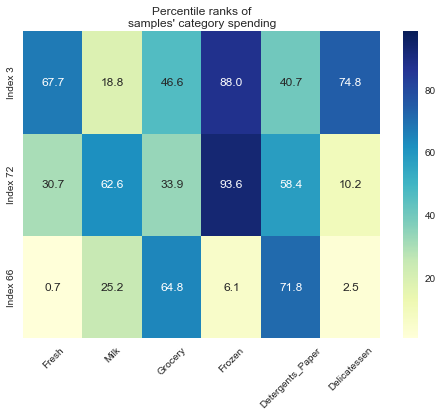

In [4]:
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

0 spends a lot in all categories except detergents and papers and milk when the spending are by far below average. They are high spenders in fresh and delicatessen, average in grocery and milk and low on papers and detergents. Probably a restaurant or a deli market. They need detergents to clean but do not order that much to resell.

1 spends a lot in milk and frozen but is a low spender in fresh and delicatessen and average on groceries and detergents/paper. Probably some kind of supermarket or groceriy store

2 is a more than avg spender in detergents, papers and groceries, less than avg in milk and almost nothing in fresh and delicatessen.  May be some kind of convenience store that does not hold many fresh products 
 




### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

features = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]

for target in features:
    #Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    copy = data.copy()
    y = copy[target]
    X = copy.drop(target, 1)
    
    #Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)
    
    #Create a decision tree regressor and fit it to the training set
    clf = DecisionTreeRegressor(random_state=999)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Report the score of the prediction using the testing set
    score = r2_score(y_test,y_pred)
    print target + ": " + str(score)

Fresh: -0.31110308145
Milk: 0.159196904077
Grocery: 0.670276673793
Frozen: -0.254344762748
Detergents_Paper: 0.352991757666
Delicatessen: -2.47853786967


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I ran a decision tree regression on all features. I removed each feature one by one and attempted to predict the values with the values of the 4 remaining features. 

Grocery has a fairly high R2 score (0.67 close to 1), meaning that grocery quantities ordered are partially explained (linearly dependant) by the quantities ordered in other categories.
Detergents_Paper and Milk also have 'good' scores (.7 and .6) meaning that they also can partly be deduced from a combination of other variables.

In that case, Grocery wouldn't be relevant as it can be deducted from purchses in other categories

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

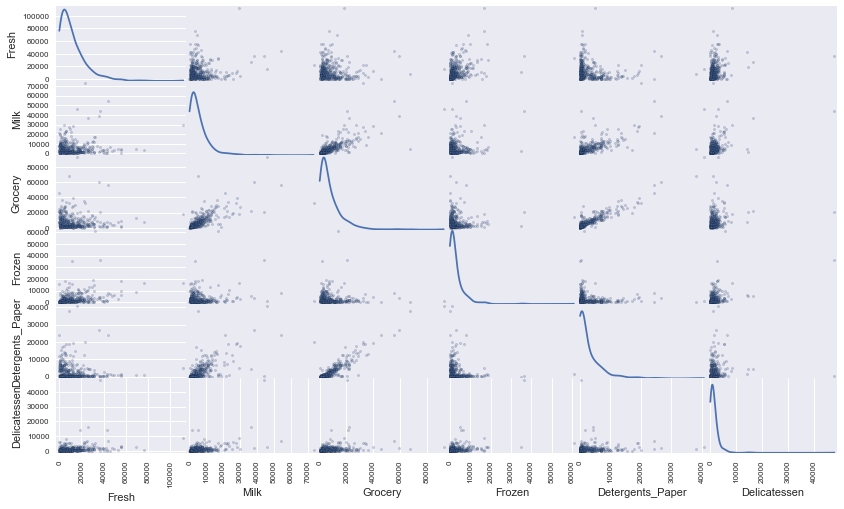

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
If we look at the 'Grocery' line we see a clear linear relationship with detergents_paper and milk. There is also a partially weaker linear relationship with frozen (when frozen > 15k), and **possibly** a negative linear relationship with Fresh products, although that could be a half normal dist with high std deviation

So yes, it clearly confirms what I found previously: a lot of the quantities ordered in groceries can be infered from quantities ordered in other categories.

Most points lie close to the center of the graph and the distribution is shaped like a normal distribution with a positive skew.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

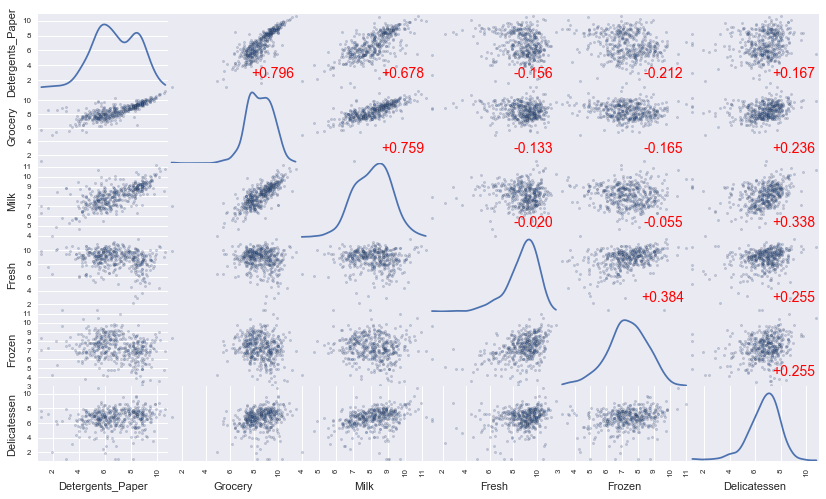

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(log_data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = log_data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',color="red", fontsize=14)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.393895,8.544614,7.886457,9.090656,7.186144,5.198497
2,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_selection = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))
    outliers_indexes = outliers_selection[outliers_selection == True].keys().tolist()
    outliers.extend(outliers_indexes)
    display(log_data[outliers_selection])
    
# Remove the outliers, if any were specified
outliers.sort()
print outliers
good_data = log_data.drop(log_data.index[list(outliers)]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


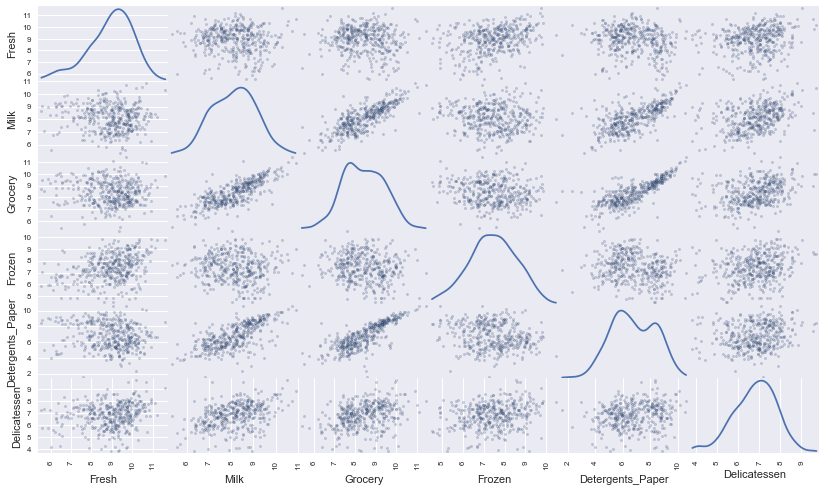

In [10]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
_Are there any data points considered outliers for more than one feature?_ 

yes: see indexes present multiple times in the array printed at the bottom of the previous output cell. 5 items are repeated: 65,66,75,128,154

_Should these data points be removed from the dataset_

I think they should: clustering associates data points by proximity. If clusters are close to each other, outliers would probably end up caught in the wrong cluster, new points (when using the model to predict) near this outliers would be categorized incorrectly anyhow. Conversely, when clusters are far from each other, there's still a good chance new data points near the removed outlier would be categorized correctly.

_If any data points were added to the `outliers` list to be removed, explain why._

For the reason stated above, I believe we don't loose much removing outliers aggressively in the context of clustering




## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]


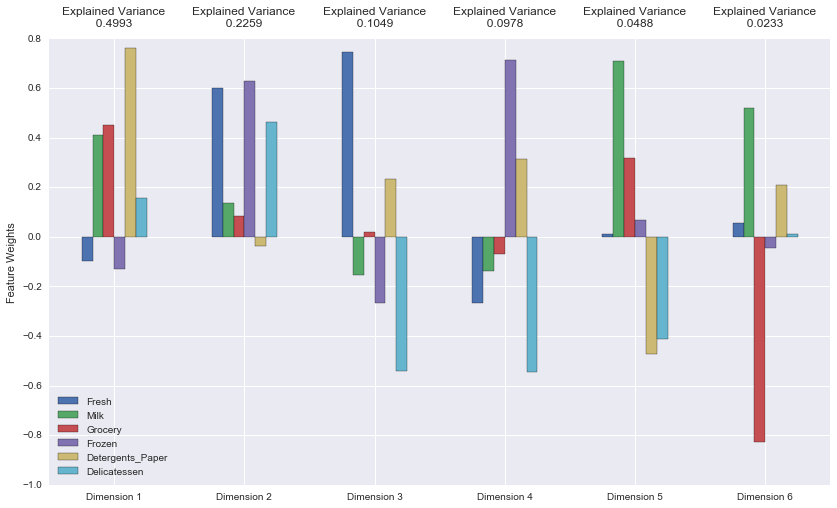

In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features

pca = PCA(n_components=6)
pca.fit(good_data)
print(pca.explained_variance_ratio_) 

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

Plotting a scatter matrix on the first 2 dimension we can see that there seem to be 2 groups of points

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

_How much variance in the data is explained in total by the first and second principal component?_

approx. 72,5%

_What about the first four principal components?_

approx. 93%

_Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending._

The dimensions are sorted by highest variance explained. Each dimension is a weighted combination of features, and movement along that nex axis explains best differences among customers. 

- The 1st dimension explains alone 50% of the variance. It means that variation of spending along this dimension is the highest factor of differenciation of customers: an increase in spending in milk, grocery, detergents/papers combined with a deacrease in spending in fresh and frozen products  (and vice versa since it goes both ways) describes the most important difference among customers

- 2nd dimension: a combined increase or decrease of fresh, frozen and delicatessen (others are negligible) explains 22% of the variance. Variation along this axis describes the 2nd most important differences among customers.

- 3rd dimension: a positive increase in fresh product combined with a decrease in delicatessen, frozen, and milk to a lower extent (or vice versa, it goes in both ways) describes the 3rd most important difference among customers. Approx. 10% of the total variance

- 4th dimension: a decrease in spending in delicatessen and to a lower extent fresh and milk products combined with an increase in spending in frozen and detergent is the 4th most important differenciation factor among customers. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9986,1.3694,-0.2854,0.3997,-0.6781,-0.6194
1,-0.1764,-0.0226,0.0408,2.3071,0.7084,0.6195
2,1.3294,-7.2150,-2.0631,2.5937,0.1701,-0.8224


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,-0.9986,1.3694
1,-0.1764,-0.0226
2,1.3294,-7.2150


### The likelihood of 2 distinct groups
The scatter plot below shows hints that there might be 2 clusters as 2 groups of points seem to emerge. 
Let's see how this look on a heatmap.

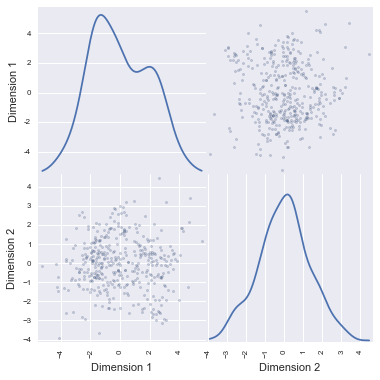

In [15]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

The heat map shows two main concentration areas, may be 3 although the 3rd one seems of less importance. The density plots at the top and at the right indicates that **dimension 1** is the main discriminant: two bumps indicates 2 concentration areas along the **Dimension 1** axis while **Dimension 2** has its main concentration on its center.

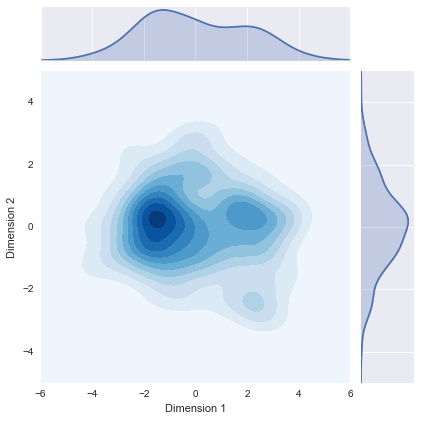

In [16]:
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- K-Means is simple to implement and computationnaly efficient. All there is to do is set K, run it several times (since centroids are assigned randomly). Because assignment is based in distance, there is no indication that a sample is misclassified.

- GMM assumes samples are normally distributed, and instead of assigning a sample to a cluster, it assigns to each sample a probability to be in each of the clusters (soft assignment). When assigning a sample to the wrong cluster has consequences, knowing the probabilities of assignment allows to make a more informed decision when processing a customer: if a customer as close to equiprobabilities to belong to 2 or more clusters, the wholesales distrubutor might consider inspect those customers by hand before assigning them to a segment.

Here we're gonna use both: Kmeans is simpler to implement especially when i comes to the silhouette analysis: GMM doesn't have a distance function we can feed silhouette with. Once we have identified the optimal number of clusters we'll use that to run a GMM with that number of clusters.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [17]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k,n_init=10,random_state=0)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
    return preds, centers, sample_preds, score
    
for i in range(2,5):
    preds, centers, sample_preds, score = clusterKMeans(i)
    print "Silhouette score for "+ str(i) + " clusters: "+str(score)

Silhouette score for 2 clusters: 0.447157742293
Silhouette score for 3 clusters: 0.36398647984
Silhouette score for 4 clusters: 0.331150954285


In [18]:
#Assign values corresponding to 2 clusters
preds, centers, sample_preds, score = clusterKMeans(2)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

- Silhouette score for 2 clusters: 0.447157742293
- Silhouette score for 3 clusters: 0.36398647984
- Silhouette score for 4 clusters: 0.331150954285

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [19]:
# I had to change the colors as I couldn't distinguish them. 
# So I copied and edited the cluster_results funtion here

def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

    predictions = pd.DataFrame(preds, columns=['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis=1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Colors
    cols = ['red','blue','yellow','green']

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):
        cluster.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2', \
                     color=cols[i], label='Cluster %i' % (i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x=c[0], y=c[1], color='white', edgecolors='black', \
                   alpha=1, linewidth=2, marker='o', s=200);
        ax.scatter(x=c[0], y=c[1], marker='$%d$' % (i), alpha=1, s=100);

    # Plot transformed sample points
    for i, sample in enumerate(pca_samples):
        ax.scatter(x=sample[0], y=sample[1], \
                   s=200, linewidth=3, color='green', marker='o', facecolors='none');
        ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125,color='green');

    # Set plot title
    ax.set_title(
        "Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


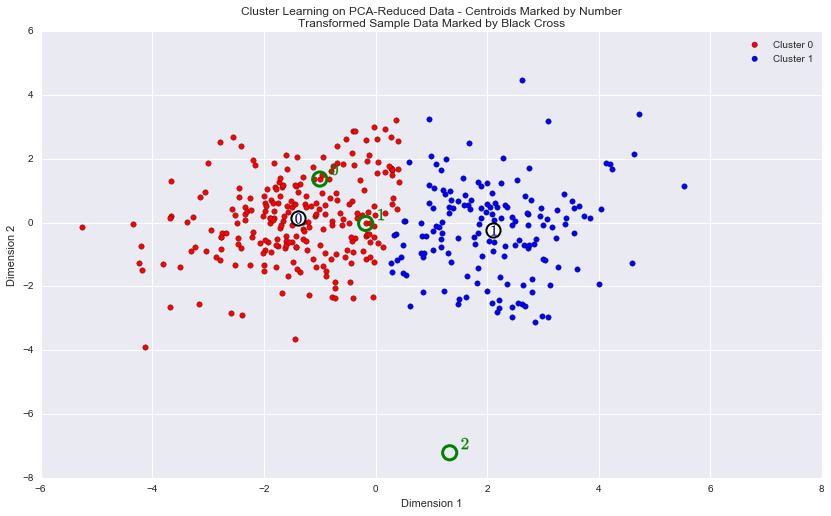

In [20]:
    # Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

The code belows builds vizualization for GMM clusters. To vizualize elements that are ambigous because their probability is close to 0.5, those elements are added to a 3rd cluster drawn in yellow. It's interesting to see how the unassigned elements vary according to the covar_type. 

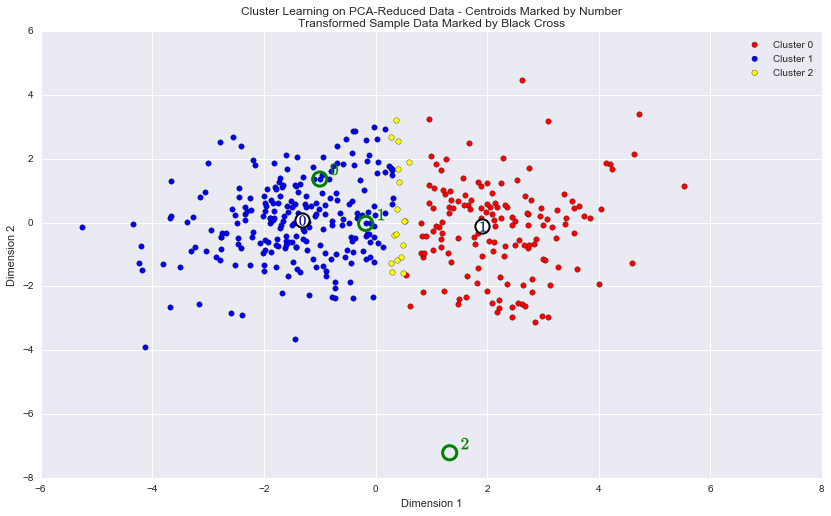

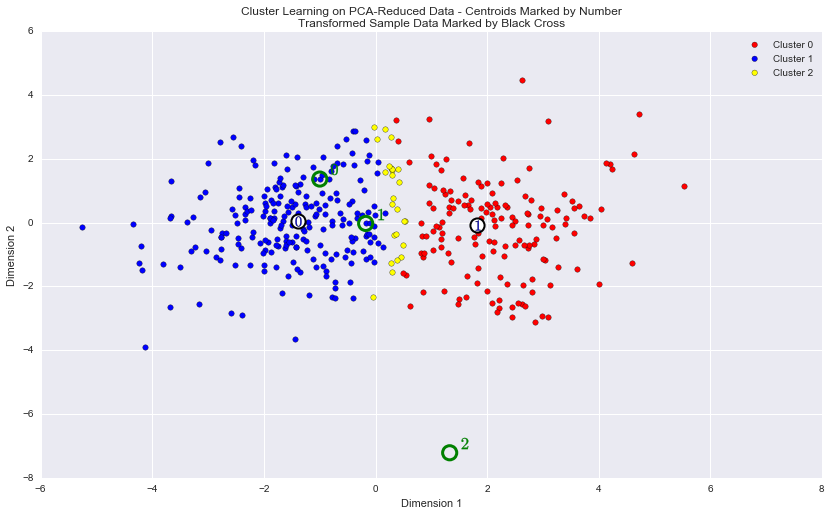

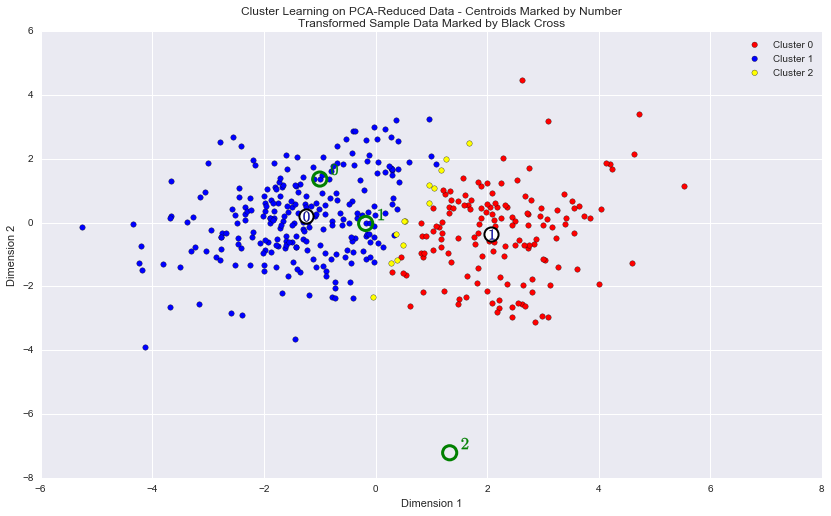

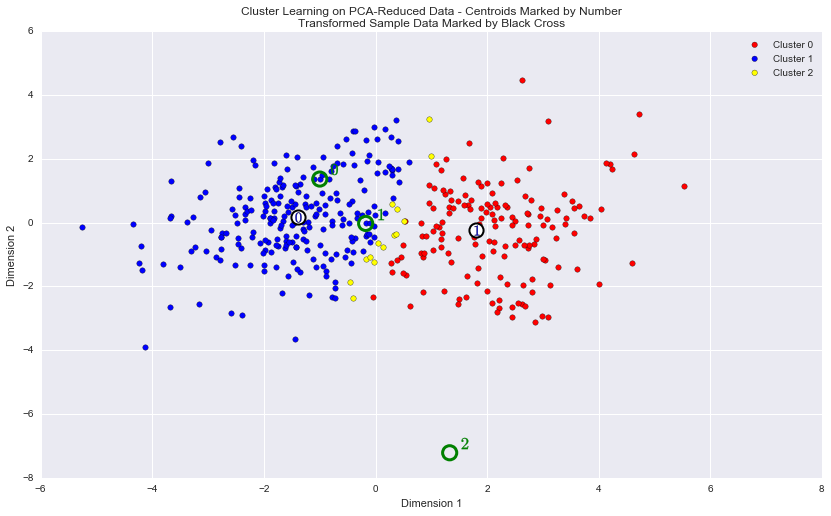

In [21]:
from sklearn.mixture import GMM
def clusterGMM(covar_type,data, k):
    classifier = GMM(n_components=k,covariance_type=covar_type, n_iter=20,random_state=0)
    classifier.fit(data)
    preds_proba = classifier.predict_proba(reduced_data)
    preds_p = []
    for item in preds_proba:
        if item[0] <= 0.4:
            preds_p.append(0)
        elif item[0] > 0.6:
            preds_p.append(1)
        else:
            preds_p.append(2)            
    centers = classifier.means_
    sample_preds = classifier.predict(reduced_samples)
    cluster_results(data, preds_p, centers,pca_samples)
    return classifier.fit(reduced_data),preds_p, centers,sample_preds

clusterGMM('spherical',reduced_data,2)
clusterGMM('diag',reduced_data,2)
clusterGMM('tied',reduced_data,2)
clusterGMM('full',reduced_data,2)
print "\n"

Intuitively the dispersion seems to be diagonal. The tails of the distributions are southwest and north east. Therefore the last 2 charts seems to closer to the reality in terms of where the ambigous points lie. Therefore my choice of clustering algorithm is GMM with 'full' covariance type

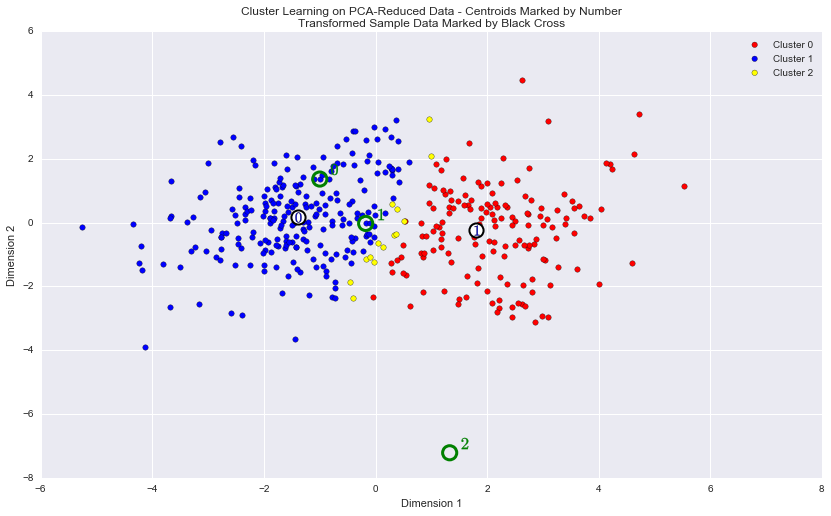

In [22]:
preds, preds_p, centers,sample_preds = clusterGMM('full',reduced_data,2)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [23]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
print ('Samples - median')
display(samples - data.median().round())
true_centers.index = segments

print ('Centers - median')
display(true_centers - data.median().round())


Samples - median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4761.0,-2431.0,-535.0,4878.0,-309.0,822.0
1,-4084.0,1512.0,-2095.0,7346.0,505.0,-785.0
2,-8495.0,-2093.0,2661.0,-1351.0,2652.0,-939.0


Centers - median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,1154.0,-1672.0,-2289.0,724.0,-508.0,-181.0
Segment 1,-2979.0,3216.0,5273.0,-372.0,2709.0,107.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- For sample '0', the values for fresh, grocery, frozen and delicatessen products is above the median while milk is below. This mimics only in part the segment 0. On the scatter plot we can see this sample has a stronger values than the center in both dimensions. So we could argue that even if it does not mimic perfectly the center of segment 0, the classification is still valid because the proportions are in line. The mismatch is mainly caused by an overall bigger purchasing volumes of sample 0.

- For sample '1', spendings in milk, frozen and detergents are stronger than median while spendings in fresh, grocery and delicatessen are weaker. Again this is only in part consistent with the segment 0. But here, as the scatter plot shows we are farther from the cluster's center and much closer to the clusters' boundary. 

- Spendings of '2' are not consistent with any of the clusters, it is actually an outlier (see question 4 where index 66 was mentionned as an outlier in several categories) and that's why it's not even plotted


Frozen products are surprisingly low for markets, but it's likely that customers don't buy everything from the same wholesaler.

In [24]:
import seaborn as sns
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)
# see how cluster predictions align with similariy of spending in each category
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2']);

NameError: name 'df_preds' is not defined

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:**
- Sample 0 (i-3) yes, I thought it was a restaurant or cafe so it fits segment 0.
- Sample 1 (i=72) Yes, it was likely to be a grocery store so it fits with segment 1
- Sample 2 (i=66) Yes, it looked like a convenience store so it fits better in the retail oriented segment 1

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
Clients ordering mostly non perishable goods are unlikely to be strongly affected by a small decrease in delivery frequency. Milk products are perishable but remain safe to consume several days and usually more than a week. So even customers buying a lot of milk products would probably adapt well to 3 deliveries a week.

Customers holding a lot a fresh products, especially restaurants, are more likely to be affected. Even if fresh products last more than 2 days, those customers tend to hold as less inventory as possible to minimize losses, and demand of fresh products is very sensitive to unpredictable factor such as wheather and temperature (demand of salads and fruits increases when weather is sunny, they can open more tables in their yard...) so daily deliveries might matter.

I would test on a portion of both group to see how each of them is actually affected. After all, all of the above is only conjectures, and the point of A/B testing is not to let conjecture rule! The distributor might decide to change delivery frequency with only one of the segments.

### Question 11
*Assume the wholesale distributor wanted to predict some other feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*

**Answer:**

The cluster can be used as a feature to predict another variable as it adds additional information, even if that feature is entirely constructed fron the others. For example, if the distributor applies a differenciated delivery policy (3 or 5 times a week), he could try predicting the delivery frequency a client new would request.





### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Horeca is a broader category than what I described as restaurants for segment 0, and so is 'retailers' that contains supermarkets and grocery stores (segment 1). So semantically the segments are consistent with  the channels.

In terms of distributions, they certainly look similar when compared to the chart in question 7.
However, one can note that data is not as separated as our clusters. The GMM with full covariance depicts better this situation. The unassigned points (in yellow) depicts better the region where cluster intersects 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.